# Is Global Warming a Thing?

#### This is an attempt  to find comparisons between the assumption that global warming is real or not.
#### To decide, you'll conduct a study on a 200-year trend from 1813-2013. These samples should be sufficient enough to determine the validity of Global Warming.

<strong>Note</strong>: to complete this data report, you will need to calculate moving average of weather over a period of 200 years. Click <a href="https://www.portent.com/blog/analytics/rolling-averages-math-moron.htm">here</a> to learn how to calculate moving averages.

<strong>Moving averages are also known as rolling averages</strong>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Retrieving Data

In [2]:
df_global = pd.read_csv('./weather_global.csv')
df_chicago = pd.read_csv('./weather_chicago.csv')

In [3]:
df_global.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


In [4]:
df_global.tail()

,year,avg_temp
261,2011,9.52
262,2012,9.51
263,2013,9.61
264,2014,9.57
265,2015,9.83


In [5]:
df_chicago.head()

,year,city,country,avg_temp
0,1743,Chicago,United States,5.44
1,1744,Chicago,United States,11.73
2,1745,Chicago,United States,1.80
3,1746,Chicago,United States,NaN
4,1747,Chicago,United States,NaN


In [6]:
df_chicago.tail()

,year,city,country,avg_temp
266,2009,Chicago,United States,10.30
267,2010,Chicago,United States,11.82
268,2011,Chicago,United States,11.21
269,2012,Chicago,United States,12.82
270,2013,Chicago,United States,11.59


## Clean Data

#### Drop 'city' and 'country' columns

In [7]:
help(df_chicago.drop)

Help on method drop in module pandas.core.frame:

drop(labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise') method of pandas.core.frame.DataFrame instance
    Drop specified labels from rows or columns.
    
    Remove rows or columns by specifying label names and corresponding
    axis, or by specifying directly index or column names. When using a
    multi-index, labels on different levels can be removed by specifying
    the level.
    
    Parameters
    ----------
    labels : single label or list-like
        Index or column labels to drop.
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Whether to drop labels from the index (0 or 'index') or
        columns (1 or 'columns').
    index : single label or list-like
        Alternative to specifying axis (``labels, axis=0``
        is equivalent to ``index=labels``).
    
        .. versionadded:: 0.21.0
    columns : single label or list-like
        Alternative to specifying axis (

In [8]:
df_chicago.drop(['city', 'country'], axis=1, inplace=True)
df_chicago.head()

,year,avg_temp
0,1743,5.44
1,1744,11.73
2,1745,1.80
3,1746,NaN
4,1747,NaN


#### Check for null values

In [9]:
df_global.isnull().sum()

year        0
avg_temp    0
dtype: int64

In [10]:
df_chicago.isnull().sum()

year        0
avg_temp    4
dtype: int64

#### Remove null values

In [11]:
df_chicago.dropna(inplace=True)
df_chicago.isnull().sum()

year        0
avg_temp    0
dtype: int64

In [12]:
df_global.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


In [13]:
df_chicago.head()

,year,avg_temp
0,1743,5.44
1,1744,11.73
2,1745,1.80
7,1750,10.49
8,1751,11.19


#### Convert all temps to Fahrenheit

In [14]:
# dot syntax - series object
df_global.avg_temp

0      8.72
1      7.98
2      5.78
3      8.39
4      8.47
       ... 
261    9.52
262    9.51
263    9.61
264    9.57
265    9.83
Name: avg_temp, Length: 266, dtype: float64

In [15]:
# literal syntax - series object
df_global['avg_temp']

0      8.72
1      7.98
2      5.78
3      8.39
4      8.47
       ... 
261    9.52
262    9.51
263    9.61
264    9.57
265    9.83
Name: avg_temp, Length: 266, dtype: float64

In [16]:
df_global.avg_temp = df_global.avg_temp.apply(lambda temp: round(temp * (9/5) + 32, 2))

In [17]:
df_global.head()

,year,avg_temp
0,1750,47.70
1,1751,46.36
2,1752,42.40
3,1753,47.10
4,1754,47.25


#### Trim results to same time period

In [18]:
df_global.query('avg_temp < 45')

,year,avg_temp
2,1752,42.40
8,1758,44.13
10,1760,44.94
18,1768,44.20
59,1809,44.74
60,1810,44.46
61,1811,44.35
62,1812,44.69
66,1816,44.49
67,1817,44.56


In [19]:
df_global[df_global['avg_temp'] < 45]

,year,avg_temp
2,1752,42.40
8,1758,44.13
10,1760,44.94
18,1768,44.20
59,1809,44.74
60,1810,44.46
61,1811,44.35
62,1812,44.69
66,1816,44.49
67,1817,44.56


In [20]:
df_global = df_global.query('year >= 1764 and year <= 2013')

In [21]:
# df_global = df_global[(df_global['year'] >= 1764) & (df_global['year'] <= 2013)]

In [22]:
df_global.head()

,year,avg_temp
14,1764,47.12
15,1765,46.85
16,1766,47.14
17,1767,46.80
18,1768,44.20


In [23]:
df_global.tail()

,year,avg_temp
259,2009,49.12
260,2010,49.46
261,2011,49.14
262,2012,49.12
263,2013,49.30


#### Save to new CSVs

In [24]:
df_global.to_csv('weather_global_v2.csv', index=False)

df_g = pd.read_csv('./weather_global_v2.csv')
df_g.head()

,year,avg_temp
0,1764,47.12
1,1765,46.85
2,1766,47.14
3,1767,46.80
4,1768,44.20


## Global 50-year moving average

#### Calculated 50-year moving average starting from 1764. First calculated average starts at 1813

In [10]:
# DON'T RUN THIS CELL
# THESE ARE THE NUMBERS YOU SHOULD BE GETTING

#### Create a new column that holds rolling averages

In [31]:
df_g['ra_50'] = df_g.avg_temp.rolling(50).mean()

In [35]:
df_g.tail()

,year,avg_temp,ra_50
245,2009,49.12,48.1466
246,2010,49.46,48.1870
247,2011,49.14,48.2130
248,2012,49.12,48.2404
249,2013,49.30,48.2674


In [11]:
# DO NOT RUN THIS CELL! YOU'LL LOSE THE VISUAL REPRESENTATION IF YOU DO!

# Create a graph that plots two scatter plots and compares the global temperature by year (orange) vs the 
# rolling average by year (green)

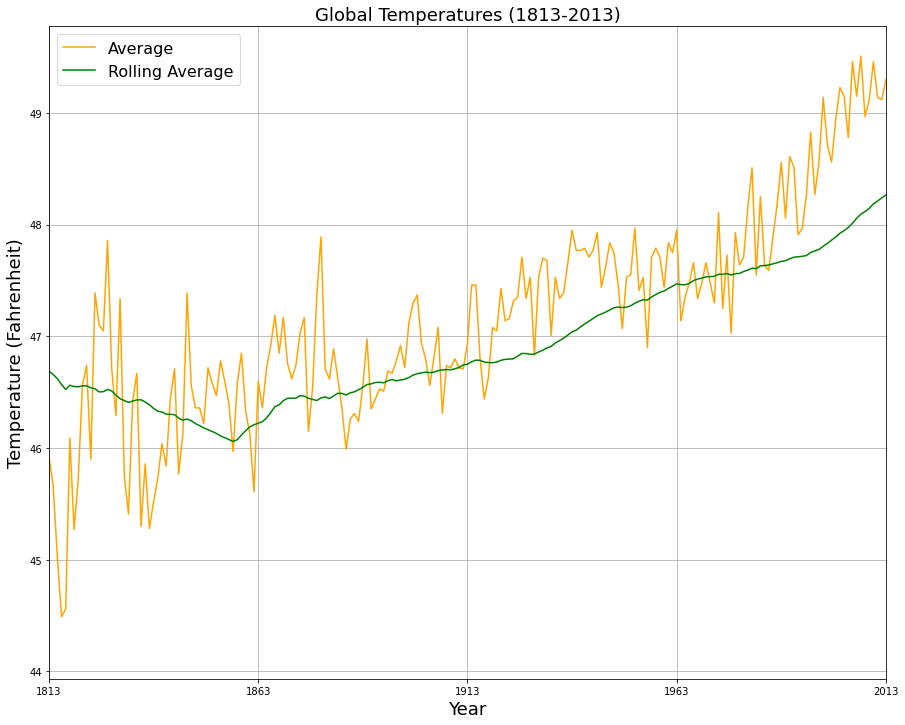

In [64]:
year_range = range(1813, 2014, 50)
year_labels = ['1813', '1863', '1913', '1963', '2013']


plt.subplots(figsize=(15, 12))

plt.grid(True)
plt.title('Global Temperatures (1813-2013)', fontsize=18)
plt.plot(df_g.year, df_g.avg_temp, color='orange')
plt.plot(df_g.year, df_g.ra_50, color='green')
plt.xlim(int(year_labels[0]), int(year_labels[-1]))
plt.xticks(year_range, year_labels)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Temperature (Fahrenheit)', fontsize=18)
plt.legend(['Average', 'Rolling Average'], loc=2, prop={'size': 16});
# plt.draw()

## Chicago 50-year moving average

#### Calculated 50-year moving average starting from 1764. First calculated average starts at 1813

In [12]:
# DON'T RUN THIS CELL
# THESE ARE THE NUMBERS YOU SHOULD BE GETTING

#### Create new column that holds rolling averages

In [13]:
# DO NOT RUN THIS CELL! YOU'LL LOSE THE VISUAL REPRESENTATION IF YOU DO!

# Create a graph that plots two scatter plots and compares the local temperature (for Chicago) by year (yellow) vs the 
# rolling average by year (green)

## Conclusions
#### 1) 
#### 2) 
#### 3) 
#### 4) 